In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from faker import Faker

fake = Faker()
city_names = [fake.city() for _ in range(10)]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November','December']

In [71]:
average_month_temperature = np.random.randint(-5,35,size=(10,12))
average_month_temperature

array([[26, 32, 14, -3, 31, 34, 32, 21, 25, 22, 27,  3],
       [13,  0, 10, 32, 22, 26, 21, 30, -3, 21, -4, 14],
       [-1, 10,  8, 13, 15, 16,  7, 34, 18,  6, -3, 13],
       [ 1, 24, 21, 22,  1, 32, 21, -1,  1, 31,  6, 18],
       [28,  9,  7,  0, 32, 12, 30, 34, 28, 20, 34,  2],
       [34,  9, 29, -1, 13,  5,  0,  2, 15, 20, 24, 16],
       [25, 29, 22, 29, -2, 13, 31, 33, -1, 14, -3, 19],
       [32, 18, -3,  1, 18, 17,  0, 19,  3, -4, 20,  8],
       [34, 34, 21, 13, 33, 10,  8, 17, 24, 16, 14, -1],
       [16, 21,  1,  4, -2, 18, 15, -1,  5, 34, 30,  4]])

In [72]:
df_avg_temp = pd.DataFrame(data=average_month_temperature, index=city_names, columns=months)

In [73]:
df_avg_temp

,January,February,March,April,May,June,July,August,September,October,November,December
Mayohaven,26,32,14,-3,31,34,32,21,25,22,27,3
South Pedro,13,0,10,32,22,26,21,30,-3,21,-4,14
North Keithborough,-1,10,8,13,15,16,7,34,18,6,-3,13
South Kyle,1,24,21,22,1,32,21,-1,1,31,6,18
West Derrickhaven,28,9,7,0,32,12,30,34,28,20,34,2
New Kennethfurt,34,9,29,-1,13,5,0,2,15,20,24,16
East Jonathanburgh,25,29,22,29,-2,13,31,33,-1,14,-3,19
Laneberg,32,18,-3,1,18,17,0,19,3,-4,20,8
Tiffanyshire,34,34,21,13,33,10,8,17,24,16,14,-1
Rogerstown,16,21,1,4,-2,18,15,-1,5,34,30,4


In [74]:
df_avg_temp.mean()

January      20.8
February     18.6
March        13.0
April        11.0
May          16.1
June         18.3
July         16.5
August       18.8
September    11.5
October      18.0
November     14.5
December      9.6
dtype: float64

In [75]:
annual_avg_temp = df_avg_temp.mean(axis=0)
annual_avg_temp

January      20.8
February     18.6
March        13.0
April        11.0
May          16.1
June         18.3
July         16.5
August       18.8
September    11.5
October      18.0
November     14.5
December      9.6
dtype: float64

In [76]:
annual_avg_temp_by_city = df_avg_temp.mean(axis=1)
annual_avg_temp_by_city

Mayohaven             22.000000
South Pedro           15.166667
North Keithborough    11.333333
South Kyle            14.750000
West Derrickhaven     19.666667
New Kennethfurt       13.833333
East Jonathanburgh    17.416667
Laneberg              10.750000
Tiffanyshire          18.583333
Rogerstown            12.083333
dtype: float64

In [77]:
city_highest_temp = annual_avg_temp_by_city.idxmax()
city_lowest_temp = annual_avg_temp_by_city.idxmin()
print(f'The city with the highest average temperature: {city_highest_temp}')
print(f'The city with the lowest average temperature: {city_lowest_temp}')

The city with the highest average temperature: Mayohaven
The city with the lowest average temperature: Laneberg


Data Visualization:

In [78]:
df_avg_temp

,January,February,March,April,May,June,July,August,September,October,November,December
Mayohaven,26,32,14,-3,31,34,32,21,25,22,27,3
South Pedro,13,0,10,32,22,26,21,30,-3,21,-4,14
North Keithborough,-1,10,8,13,15,16,7,34,18,6,-3,13
South Kyle,1,24,21,22,1,32,21,-1,1,31,6,18
West Derrickhaven,28,9,7,0,32,12,30,34,28,20,34,2
New Kennethfurt,34,9,29,-1,13,5,0,2,15,20,24,16
East Jonathanburgh,25,29,22,29,-2,13,31,33,-1,14,-3,19
Laneberg,32,18,-3,1,18,17,0,19,3,-4,20,8
Tiffanyshire,34,34,21,13,33,10,8,17,24,16,14,-1
Rogerstown,16,21,1,4,-2,18,15,-1,5,34,30,4


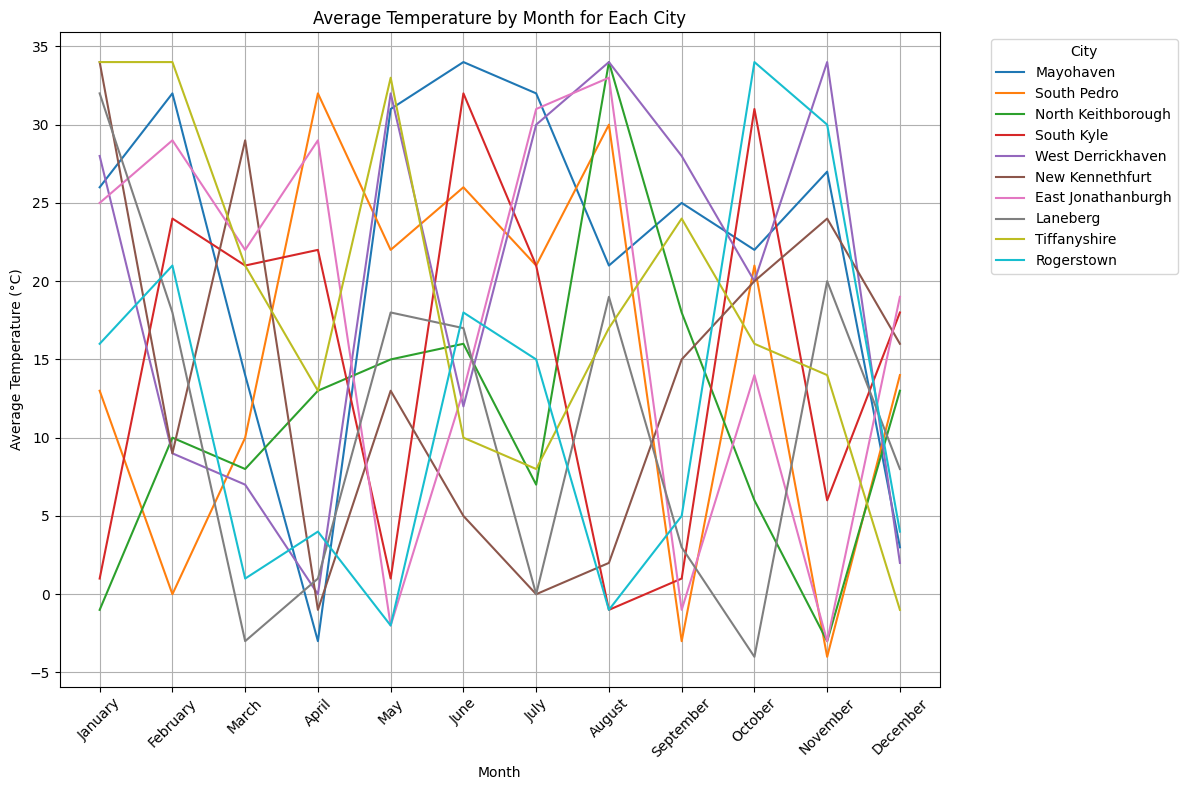

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for plotting
df_avg_temp = df_avg_temp.stack().reset_index()
df_avg_temp.columns = ['City', 'Month', 'Temperature']

# Plot the average temperature by month for each city
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_avg_temp, x='Month', y='Temperature', hue='City', markers=True, dashes=False)
plt.title('Average Temperature by Month for Each City')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

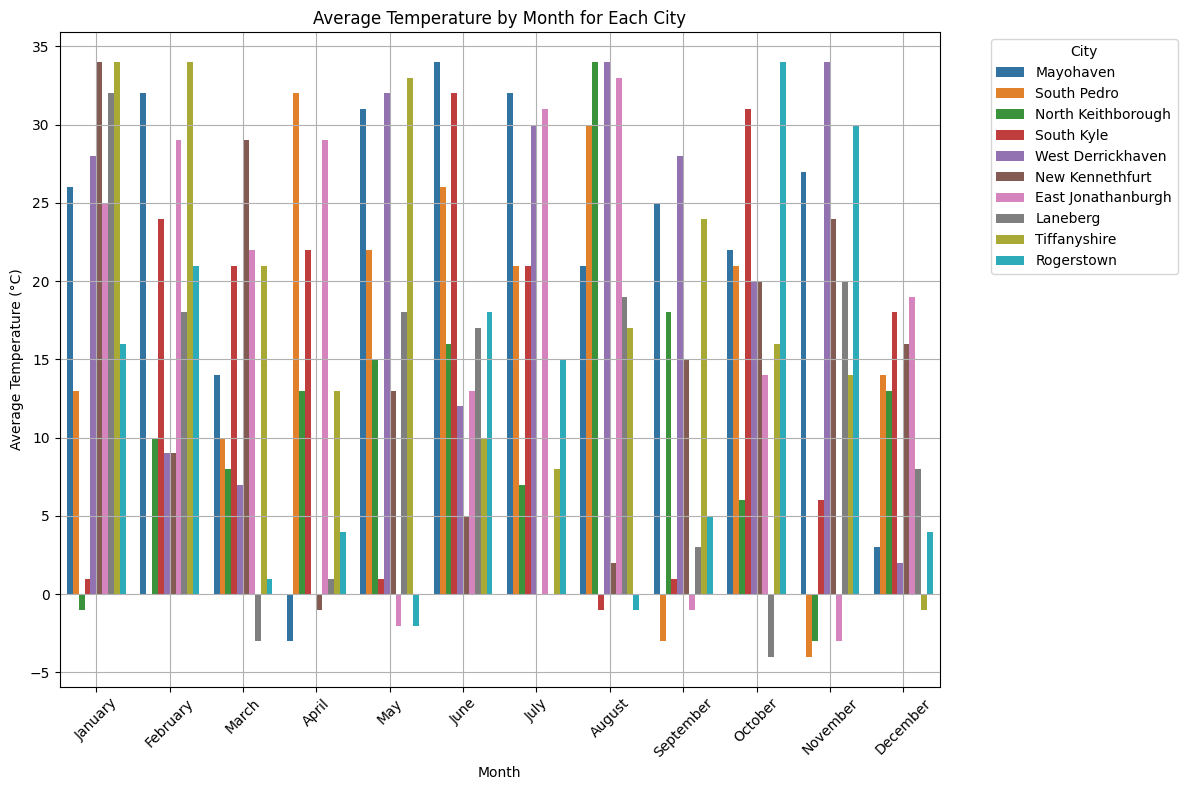

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_avg_temp, x='Month', y='Temperature', hue='City')
plt.title('Average Temperature by Month for Each City')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

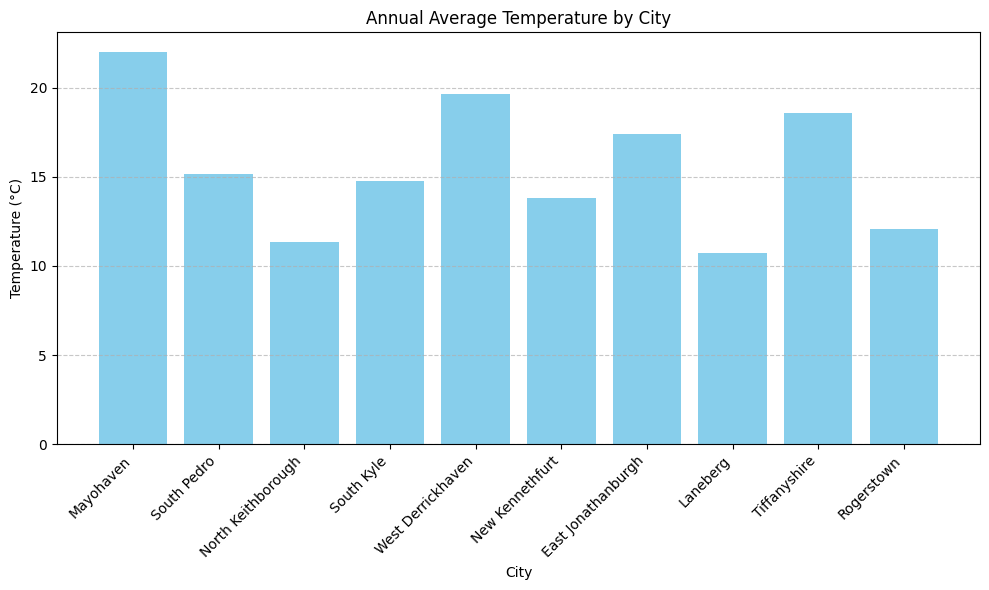

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(annual_avg_temp_by_city.index, annual_avg_temp_by_city, color='skyblue')
plt.title('Annual Average Temperature by City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Temperature'}>]], dtype=object)

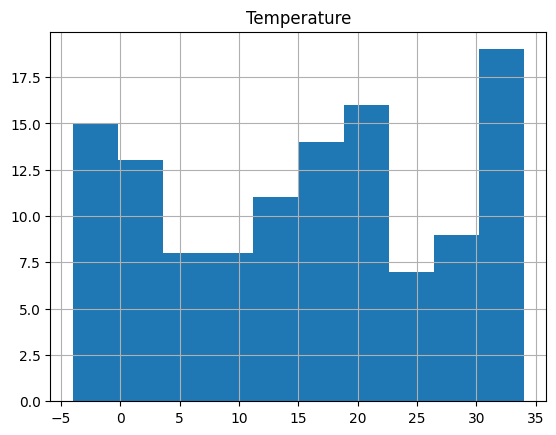

In [82]:
df_avg_temp.hist()

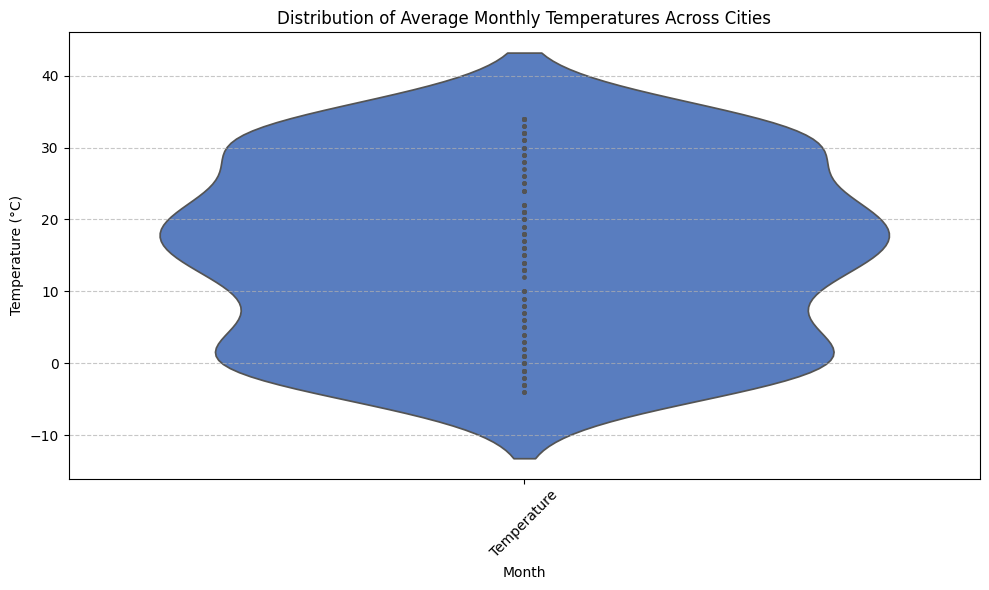

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_avg_temp, inner="points", palette="muted")
plt.title('Distribution of Average Monthly Temperatures Across Cities')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The city with the highest average temperature: Mayohaven
The city with the lowest average temperature: Laneberg
